In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

KeyboardInterrupt: 

In [3]:
data= pd.read_csv('cleaned_data.csv')
data = data.drop('Target', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

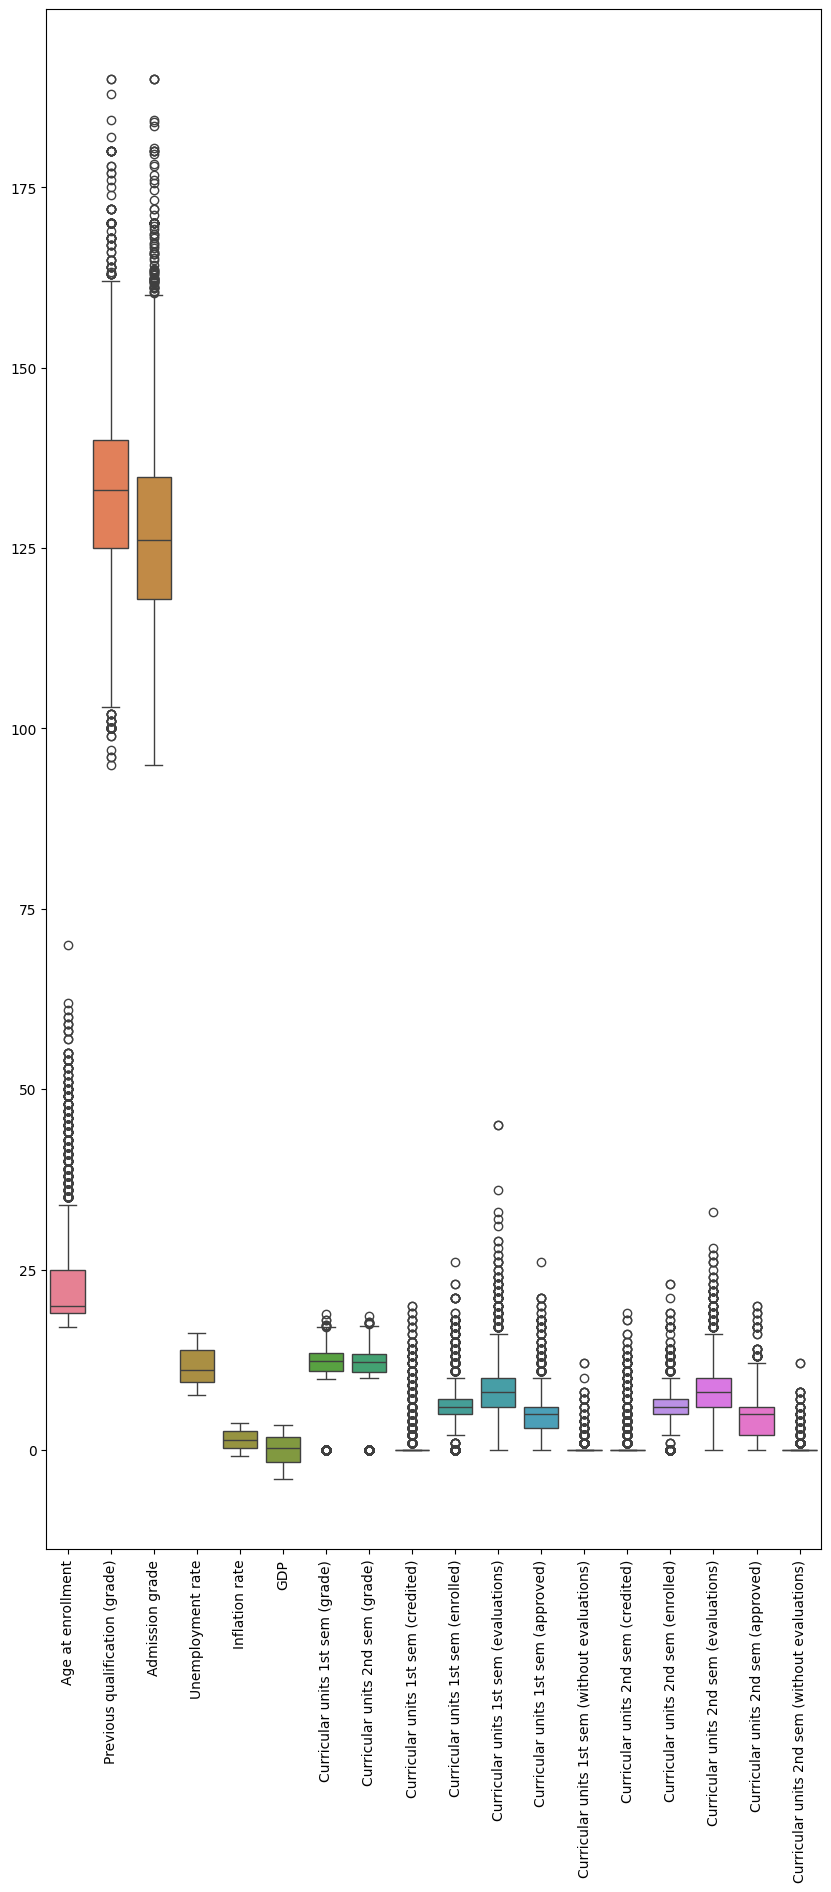

In [4]:
#Checking the variance of the numeric variables
numerics = ['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)']
fig =  plt.figure(figsize=(10,20))
sns.boxplot(data[numerics])
plt.xticks(rotation=90)
plt.show()

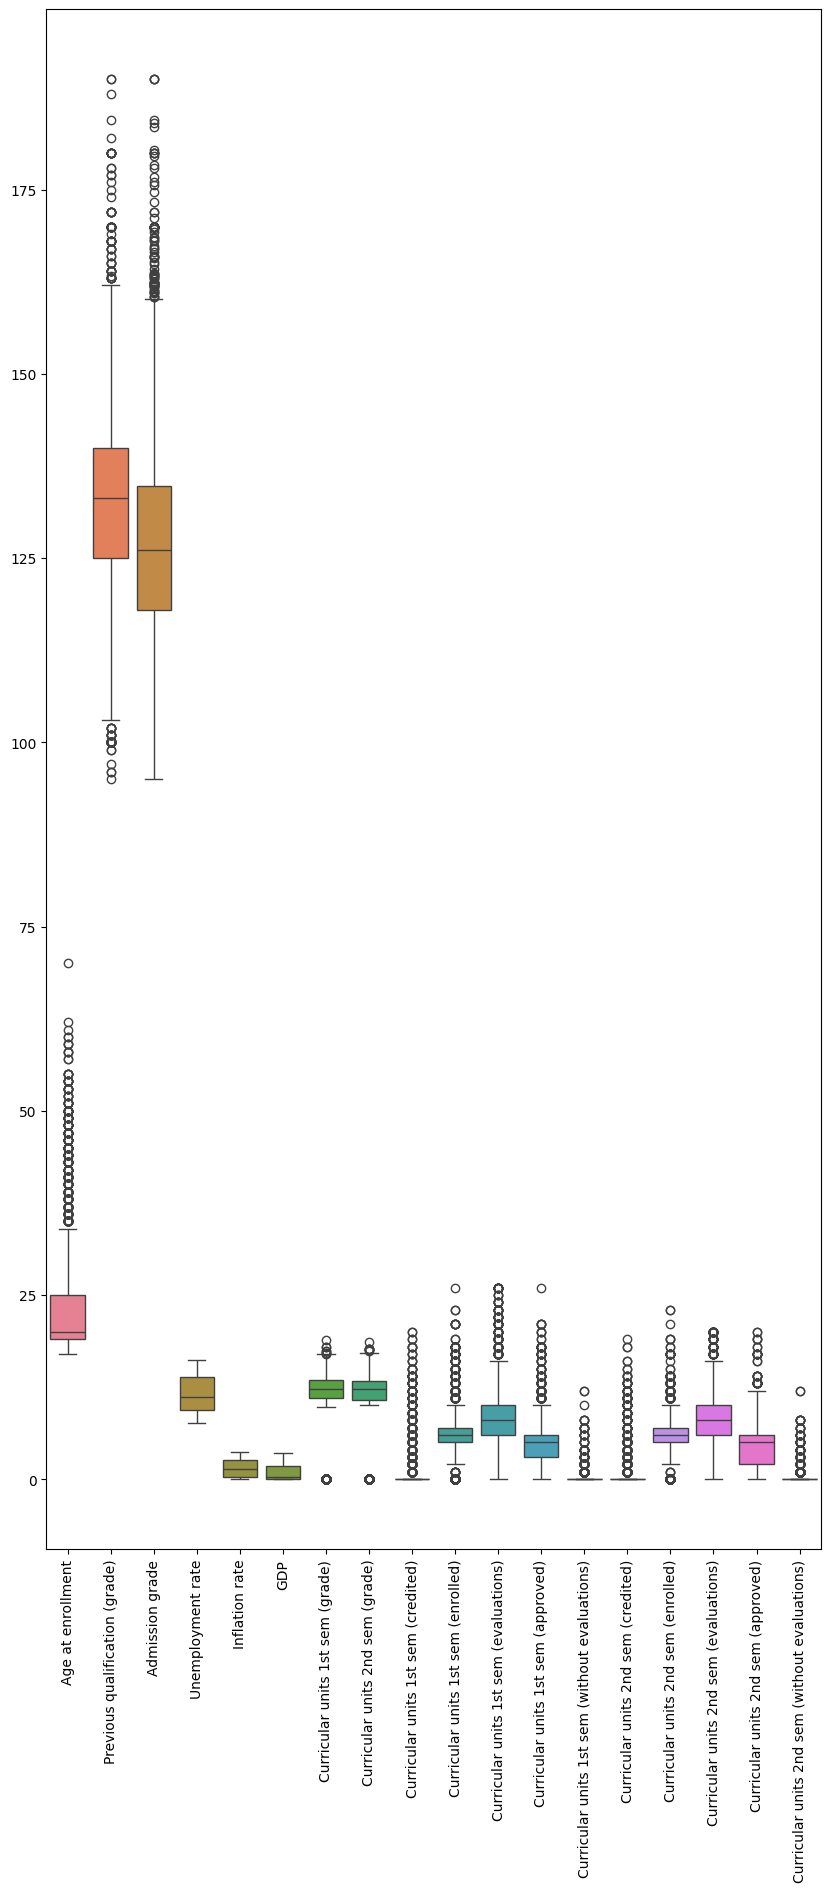

In [5]:
# def outliers(df,col):
#   mean = df[col].mean()
#   std = df[col].std()
#   cutoff = std*3
#   lower, upper = mean - cutoff, mean + cutoff
#   return df[(df[col]>lower) & (df[col]<upper)]

# school_df =outliers(data,'Curricular units 1st sem (evaluations)')


data.loc[data['Curricular units 1st sem (evaluations)']>26,'Curricular units 1st sem (evaluations)']=26
data.loc[data['Curricular units 2nd sem (evaluations)']>20,'Curricular units 2nd sem (evaluations)']=20
data.loc[data['GDP']<0,'GDP']=0
data.loc[data['Inflation rate']<0,'Inflation rate']=0

school_df = data.copy()
fig = plt.figure(figsize=(10,20))
sns.boxplot(school_df[numerics])
plt.xticks(rotation=90)
plt.show()

In [6]:
school_df[numerics].describe()

,Age at enrollment,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,132.613314,126.978119,11.566139,1.350859,0.978488,10.640848,10.230201,0.709991,6.270570,8.281872,4.706600,0.137658,0.541817,6.232143,8.037975,4.435805,0.150316
std,7.587816,13.188332,14.482001,2.663850,1.228818,1.095131,4.843666,5.210819,2.360507,2.480178,4.079237,3.094238,0.690880,1.918546,2.195951,3.853044,3.014764,0.753774
min,17.000000,95.000000,95.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,125.000000,117.900000,9.400000,0.300000,0.000000,11.000000,10.750000,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000
50%,20.000000,133.100000,126.100000,11.100000,1.400000,0.320000,12.290000,12.200000,0.000000,6.000000,8.000000,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000
75%,25.000000,140.000000,134.800000,13.900000,2.600000,1.790000,13.400000,13.330000,0.000000,7.000000,10.000000,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000
max,70.000000,190.000000,190.000000,16.200000,3.700000,3.510000,18.880000,18.570000,20.000000,26.000000,26.000000,26.000000,12.000000,19.000000,23.000000,20.000000,20.000000,12.000000


#  Feature Creation

 Develop new features based on domain knowledge (e.g., study time per credit
)
• Create interaction terms between existing features
• Implement polynomial features for numerical variables
• Develop time-based features (e.g., time since last ex

In [7]:
school_df['Total Curricular units (grade)']	= school_df['Curricular units 1st sem (grade)'] + school_df['Curricular units 2nd sem (grade)']
school_df['Total Curricular units (credited)']	= school_df['Curricular units 1st sem (credited)'] + school_df['Curricular units 2nd sem (credited)']
school_df['Total Curricular units (enrolled)'] = school_df['Curricular units 1st sem (enrolled)']	+ school_df['Curricular units 2nd sem (enrolled)']
school_df['Total Curricular units (evaluations)'] = school_df['Curricular units 1st sem (evaluations)'] + school_df['Curricular units 2nd sem (evaluations)']
school_df['Total Curricular units (approved)'] = school_df['Curricular units 2nd sem (approved)']	+ school_df['Curricular units 2nd sem (approved)']
school_df['Total Curricular units (without evaluations)'] = school_df['Curricular units 2nd sem (without evaluations)'] +school_df ['Curricular units 2nd sem (without evaluations)']

for all in numerics[6:]:
  school_df.drop(all,axis=1,inplace=True)
num=['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Total Curricular units (grade)','Total Curricular units (credited)','Total Curricular units (enrolled)','Total Curricular units (evaluations)','Total Curricular units (approved)','Total Curricular units (without evaluations)']

school_df['Previous qualification (grade)'].value_counts()
school_df[num].isna().sum()



,0
Age at enrollment,0
Previous qualification (grade),0
Admission grade,0
Unemployment rate,0
Inflation rate,0
GDP,0
Total Curricular units (grade),0
Total Curricular units (credited),0
Total Curricular units (enrolled),0
Total Curricular units (evaluations),0


In [8]:
sns.pairplot(school_df[num])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,interaction_only=True)
poly.fit_transform(school_df[num].values)

array([[  1.,  20., 122., ...,   0.,   0.,   0.],
       [  1.,  19., 160., ...,   0.,   0.,   0.],
       [  1.,  19., 122., ...,   0.,   0.,   0.],
       ...,
       [  1.,  30., 154., ...,   0.,   0.,   0.],
       [  1.,  20., 180., ...,   0.,   0.,   0.],
       [  1.,  22., 152., ...,   0.,   0.,   0.]])

### Feature Transformation
• Apply log transformation to skewed numerical features
• Bin continuous variables into categorical ones where appropriate
• Standardize numerical features

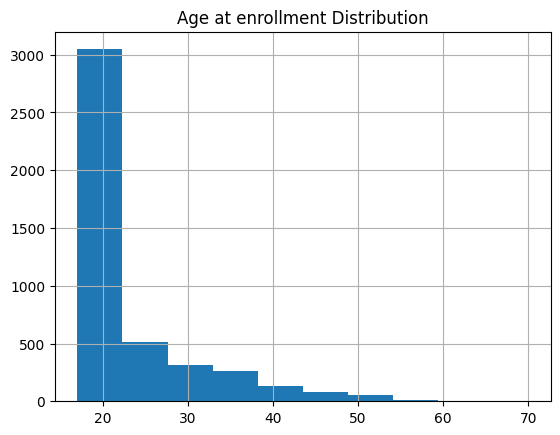

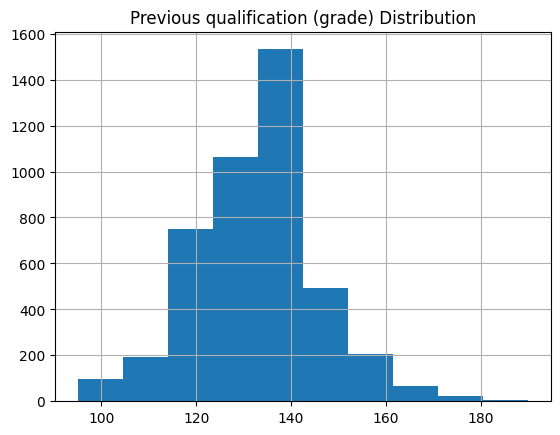

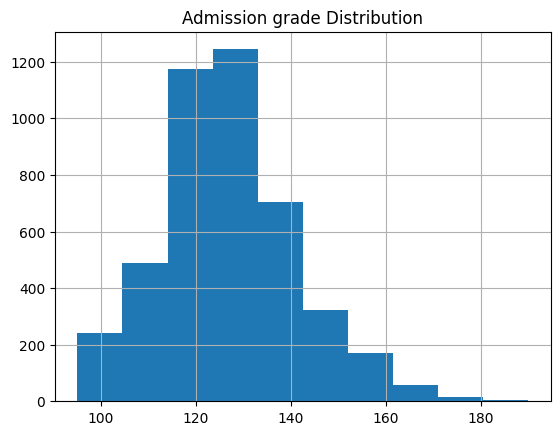

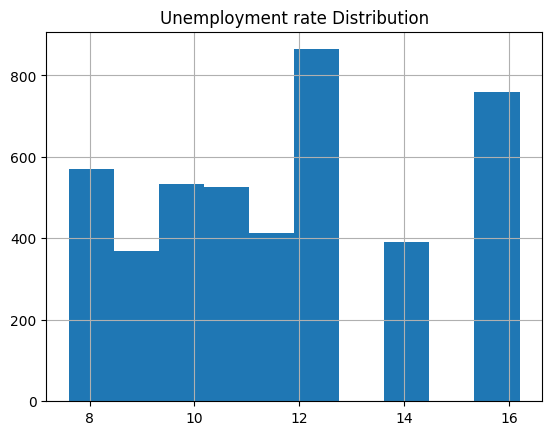

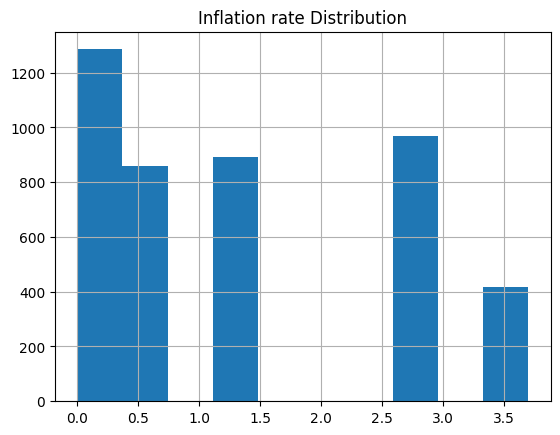

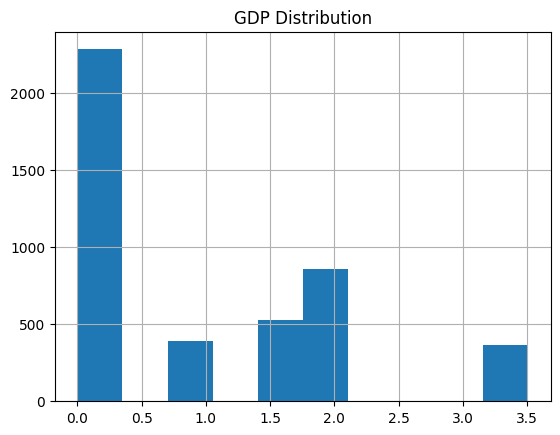

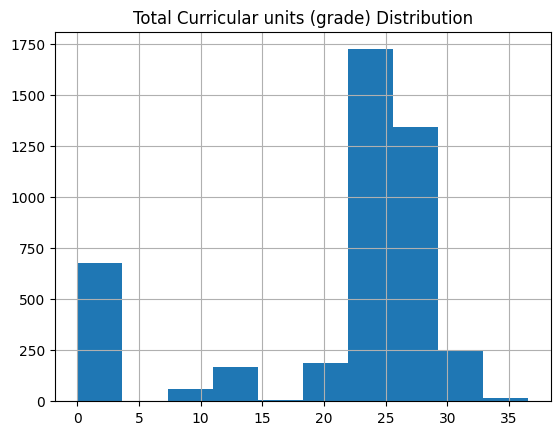

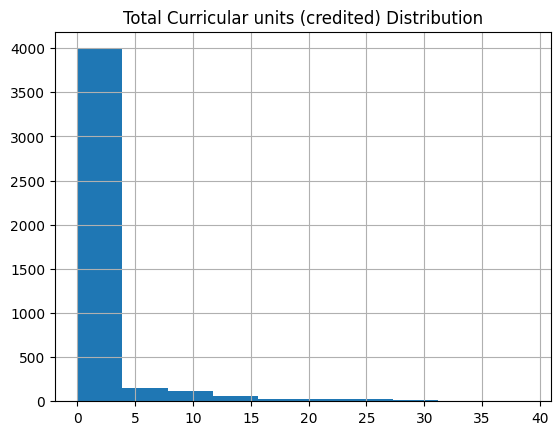

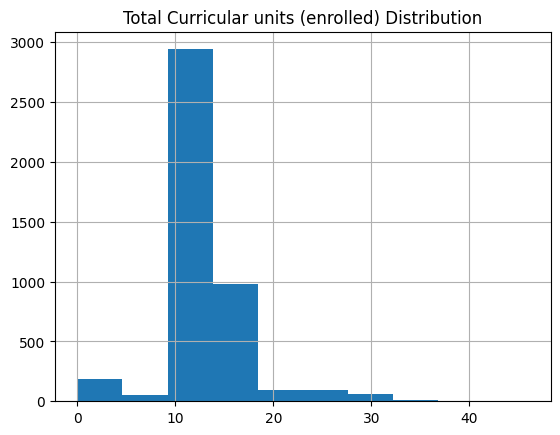

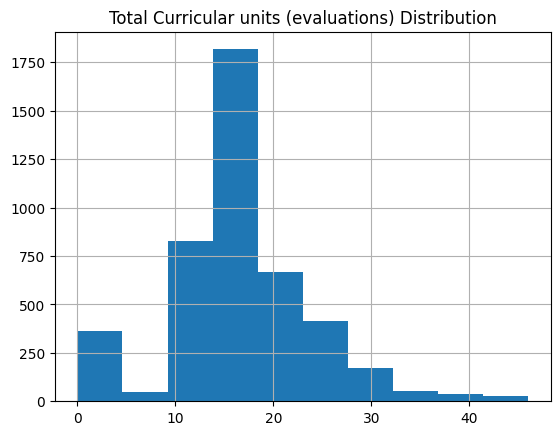

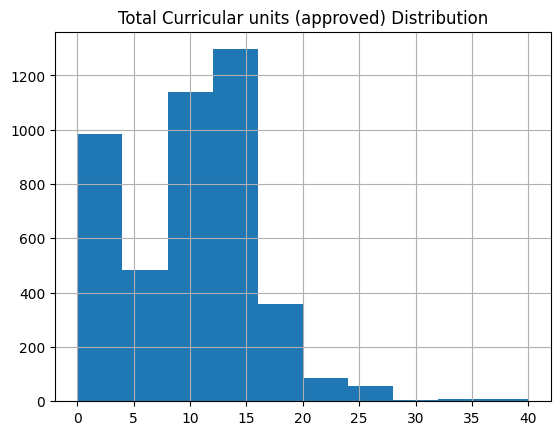

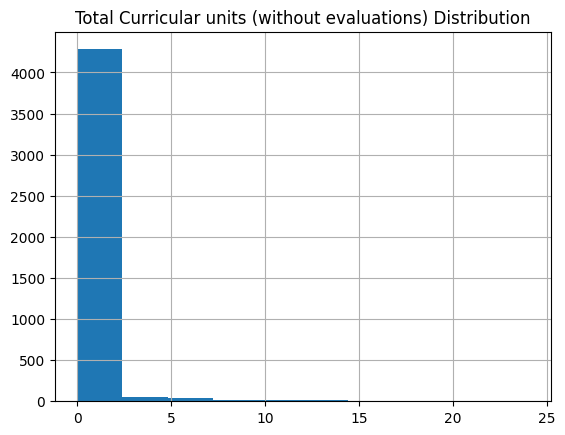

In [10]:
# Checking the distribution of the numeric variables
for numeric in num:
    school_df[f'{numeric}'].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

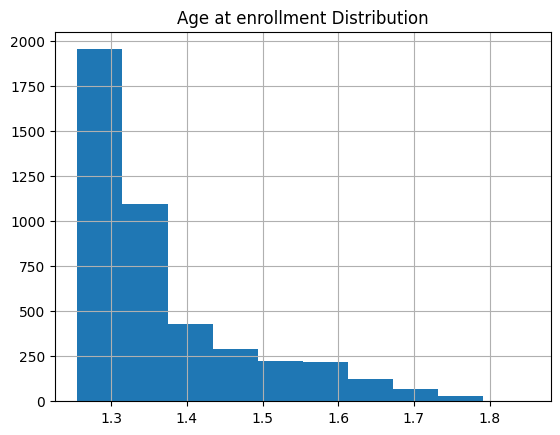

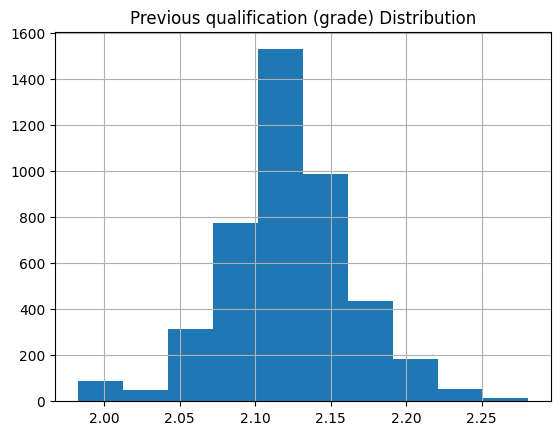

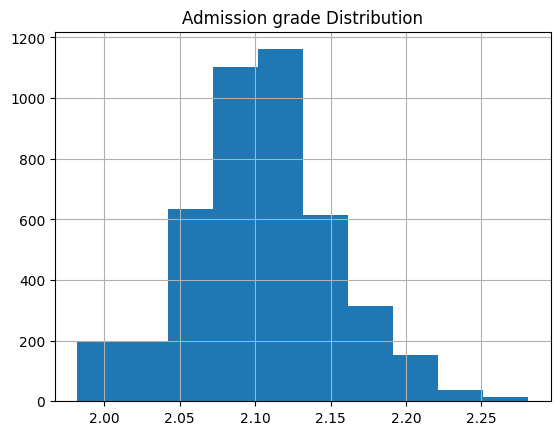

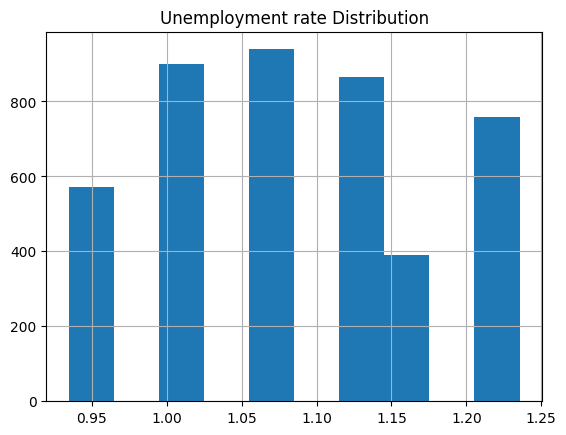

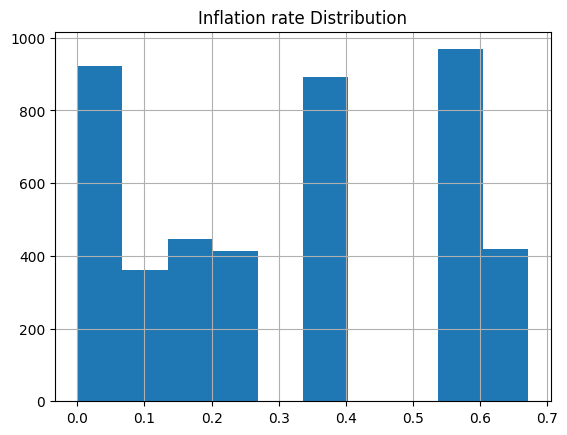

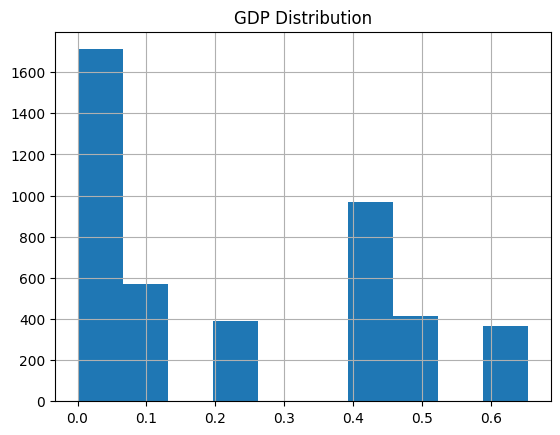

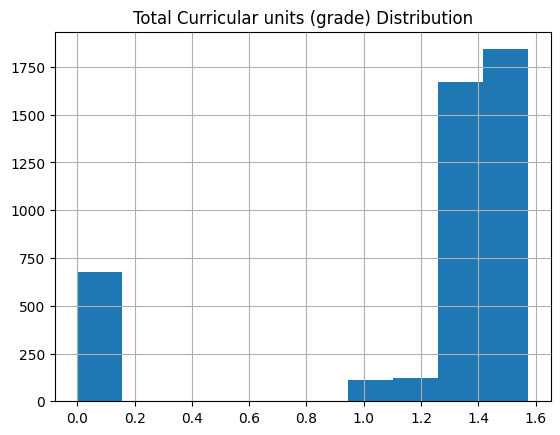

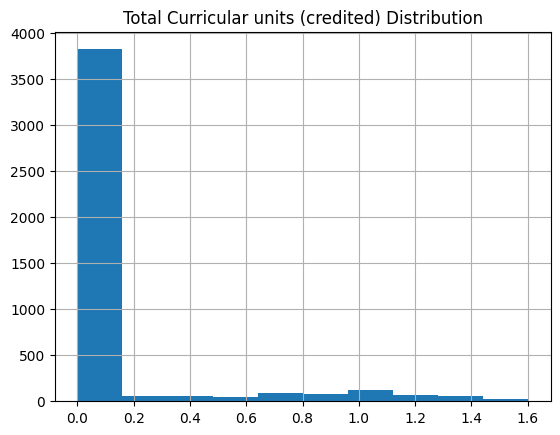

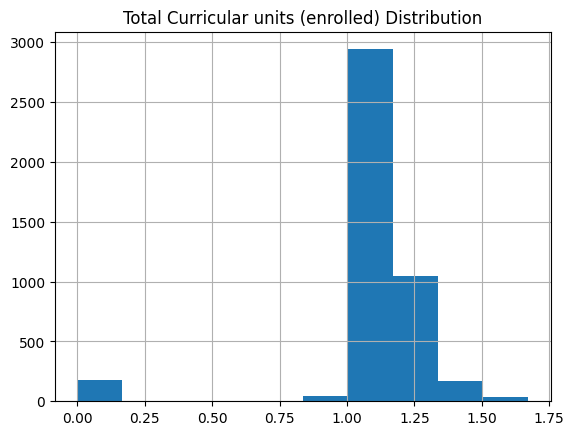

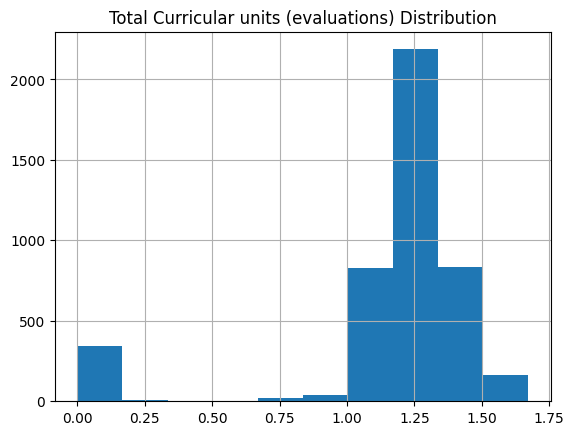

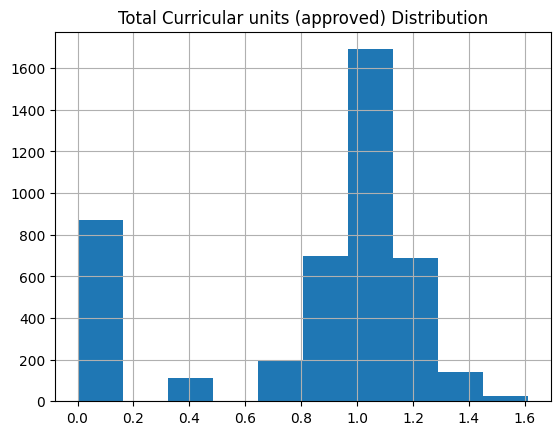

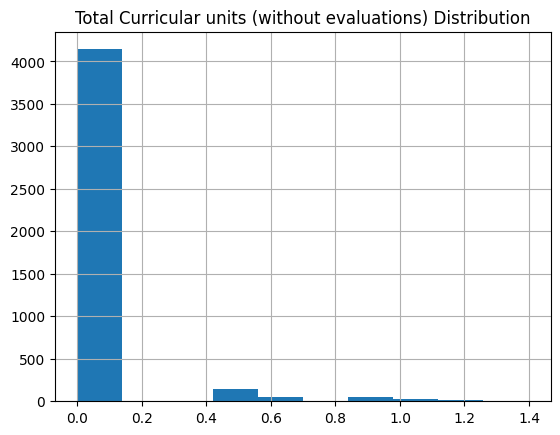

In [11]:
for n in num:
  school_df[n]=np.log10(school_df[n]+1)

for numeric in num:
    school_df[numeric].hist()
    plt.title(f'{numeric} Distribution')
    plt.show()

In [12]:
school_df['Admission grade'] = pd.cut(school_df['Admission grade'],bins=[0,130,150,170,190], labels=[10,20,30,40])
school_df['Previous qualification (grade)'] = pd.cut(school_df['Previous qualification (grade)'], bins=[0,130,150,170,190], labels=[10,20,30,40])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
school_df[num] = scaler.fit_transform(school_df[num])

## Feature selection
1. Chisquare for filtering

In [14]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_columns = school_df.drop('Target_encoded', axis=1).columns
X= school_df.drop('Target_encoded',axis=1).values
y= school_df['Target_encoded'].values

In [15]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[8.081e+01 9.510e+02 3.933e+01 3.360e+00 3.138e+00 3.971e+02       nan
 1.223e+01 1.610e+02 5.725e+01 6.774e+01 1.379e+02       nan 2.608e+01
 6.346e-01 2.298e+02 9.829e+01 1.512e+02 3.081e+02 6.284e+01 1.248e+00
 2.285e+00 9.939e-01 5.325e+00 1.535e+02 4.745e+00 2.098e+00 1.617e+01
 2.705e+02 2.325e+01]
[[ 7.     0.    12.     9.     0.     1.     1.     0.     0.     0.   ]
 [ 5.     0.     0.     3.     0.     0.     1.     0.     0.925  0.691]
 [ 0.     0.    21.     9.     0.     0.     1.     0.     0.     0.   ]
 [ 7.     0.    22.     3.     0.     1.     0.     0.     0.907  0.646]
 [11.     0.    21.     9.     0.     1.     0.     0.     0.902  0.691]]


2. Recursive Feature Elimination

In [16]:
# Feature extraction
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
important_features = pd.DataFrame(list(zip(X_columns,fit.support_)),columns=['Feature','Important'])
important_features.sort_values(by='Important', ascending=False)

,Feature,Important
16,Tuition fees up to date,True
21,Unemployment rate,True
28,Total Curricular units (approved),True
3,Course,True
27,Total Curricular units (evaluations),True
26,Total Curricular units (enrolled),True
24,Total Curricular units (grade),True
19,Age at enrollment,True
10,Mother's occupation,True
11,Father's occupation,True


In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, random_state=None, solver='auto', tol=0.001)
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))


Ridge model: 0.016 * X0 + -0.009 * X1 + -0.001 * X2 + -0.018 * X3 + -0.065 * X4 + 0.006 * X5 + 0.0 * X6 + -0.022 * X7 + -0.002 * X8 + 0.001 * X9 + 0.008 * X10 + -0.001 * X11 + 0.0 * X12 + -0.027 * X13 + -0.11 * X14 + -0.178 * X15 + 0.427 * X16 + -0.09 * X17 + 0.216 * X18 + -0.243 * X19 + 0.35 * X20 + -0.015 * X21 + -0.0 * X22 + 0.017 * X23 + -0.508 * X24 + -0.385 * X25 + -0.704 * X26 + -0.217 * X27 + 2.619 * X28 + -0.065 * X29


Dimensional Reduction
1. PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(10)
pca.fit_transform(X)
pca.n_components_

10

In [19]:
pca.explained_variance_ratio_

array([0.514, 0.148, 0.107, 0.102, 0.058, 0.034, 0.015, 0.01 , 0.005,
       0.001])

T-SNE

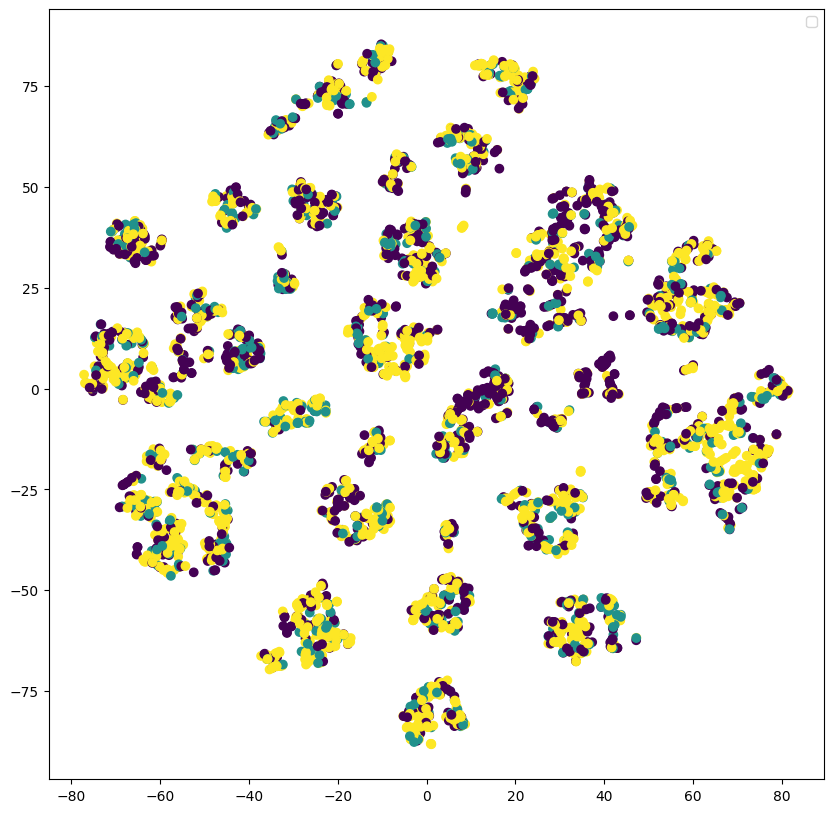

In [22]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,perplexity=20,random_state=42)
tsne_df = tsne.fit_transform(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_df[:,0],tsne_df[:,1],c=y)
plt.legend()
plt.show()

In [ ]:
school_df.to_csv('updated_data.csv')